## Part 1

2. Implementation

In [32]:
import pandas as pd
import numpy as np
import sklearn as sk
from IPython.display import display
from sklearn import preprocessing


In [33]:
%matplotlib inline
data = pd.read_csv("data.csv")
(data.head())

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (0,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07T00:00:00.000Z,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN


## 1. Describe the dataset

## Categories/domains

In [34]:
list(data)

['Id',
 'Title',
 'Company',
 'Date',
 'Location',
 'Area',
 'Classification',
 'SubClassification',
 'Requirement',
 'FullDescription',
 'LowestSalary',
 'HighestSalary',
 'JobType']

## Size of each variation (318477)

In [35]:
data.shape

(318477, 13)

## Structure/format

In [36]:
data.dtypes

Id                   object
Title                object
Company              object
Date                 object
Location             object
Area                 object
Classification       object
SubClassification    object
Requirement          object
FullDescription      object
LowestSalary          int64
HighestSalary         int64
JobType              object
dtype: object

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318477 entries, 0 to 318476
Data columns (total 13 columns):
Id                   318477 non-null object
Title                318477 non-null object
Company              306473 non-null object
Date                 318477 non-null object
Location             197229 non-null object
Area                 122658 non-null object
Classification       197229 non-null object
SubClassification    197229 non-null object
Requirement          318470 non-null object
FullDescription      302302 non-null object
LowestSalary         318477 non-null int64
HighestSalary        318477 non-null int64
JobType              302379 non-null object
dtypes: int64(2), object(11)
memory usage: 31.6+ MB


## attributes/features of review data 

For the purpost of this analysis, we are going to need to look at all the countries except for id

This is because we will be examining how the job market at different location changes over time. This period over which the data were collected rages from 2018-10-01 to 2010-03-13

Other features such as job classification and requirements will also be used to support out analysis

Lowest and Highest Salary is going to tell us the relationship between job classicication and the amount of pay

## 2.Steps used for data preparation and preprocessing 

Load data

In [38]:
data = pd.read_csv("data.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (0,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Normalize the data

In [39]:
data_norm = (data["LowestSalary"] - data["LowestSalary"].min()) / (data["LowestSalary"].max() - data["LowestSalary"].min())*20
data_norm

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
5          0.0
6          0.0
7          0.0
8          0.0
9          0.0
10         0.0
11         0.0
12         0.0
13         0.0
14         0.0
15         0.0
16         0.0
17         0.0
18         0.0
19         0.0
20         0.0
21         0.0
22         0.0
23         0.0
24         0.0
25         0.0
26         0.0
27         0.0
28         0.0
29         0.0
          ... 
318447    12.0
318448    12.0
318449    12.0
318450    12.0
318451    12.0
318452    12.0
318453    12.0
318454    12.0
318455    12.0
318456    12.0
318457    12.0
318458    15.0
318459    15.0
318460    15.0
318461    15.0
318462    15.0
318463    15.0
318464    15.0
318465    15.0
318466    15.0
318467    15.0
318468    15.0
318469    20.0
318470    20.0
318471    20.0
318472    20.0
318473    20.0
318474    20.0
318475    20.0
318476    20.0
Name: LowestSalary, Length: 318477, dtype: float64

In [40]:
data_norm = (data["HighestSalary"] - data["HighestSalary"].min()) / (data["HighestSalary"].max() - data["HighestSalary"].min())*20
data_norm

0          0.000000
1          0.000000
2          0.000000
3          0.000000
4          0.000000
5          0.000000
6          0.000000
7          0.000000
8          0.000000
9          0.000000
10         0.000000
11         0.000000
12         0.000000
13         0.000000
14         0.000000
15         0.000000
16         0.000000
17         0.000000
18         0.000000
19         0.000000
20         0.000000
21         0.000000
22         0.000000
23         0.000000
24         0.000000
25         0.000000
26         0.000000
27         0.000000
28         0.000000
29         0.000000
            ...    
318447     2.476780
318448     2.476780
318449     2.476780
318450     2.476780
318451     2.476780
318452     2.476780
318453     2.476780
318454     2.476780
318455     2.476780
318456     2.476780
318457     2.476780
318458     3.508772
318459     3.508772
318460     3.508772
318461     3.508772
318462     3.508772
318463     3.508772
318464     3.508772
318465     3.508772


In [41]:
data['JobType'].unique()

array([nan, 'Full Time', 'Contract/Temp', 'Part Time', 'Casual/Vacation'],
      dtype=object)

In [42]:
data['Area'].isnull().sum()

195819

In [43]:
data['Location'].isnull().sum()

121248

In [44]:
data['Classification'].isnull().sum()

121248

In [45]:
data['SubClassification'].isnull().sum()

121248

We can see that there are a lot of missing values for Location, Area, Classification, and sub-Classification but we are not sure if the analysis need to focus on this part

## Clean the data

We see that the ID we dont use so we drop that

In [46]:
data.drop(['Id'],axis=1,inplace=True)

Secondly the jobtype some information is missing so we fill that is no information

In [47]:
data['JobType']= data['JobType'].fillna('No information')

In [48]:
data.tail()

,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
318472,Program Manager - Trade Reporting,Talenza,2019-03-13T00:00:00.000Z,NaN,NaN,NaN,NaN,Our client is a large Financial Services firm ...,NaN,200,999,No information
318473,Web Content Writer - June 2019 contract,Talent – Winner ‘Seek Large Recruitment Agency...,2019-03-13T00:00:00.000Z,NaN,NaN,NaN,NaN,You will be able to write clearly and concisel...,NaN,200,999,No information
318474,Brand Director - Global Premium Brand,Retail Career Consulting Pty Ltd,2019-03-12T00:00:00.000Z,NaN,NaN,NaN,NaN,Newly created Brand Director AUS. Must be comm...,NaN,200,999,No information
318475,"Head of Financial Planning, Reporting & Strategy",Moir Group,2019-03-08T00:00:00.000Z,NaN,NaN,NaN,NaN,High-quality manufacturing organisation. Excit...,NaN,200,999,No information
318476,Head of Operations - EOI,Austcorp Executive,2019-03-13T00:00:00.000Z,NaN,NaN,NaN,NaN,Expressions of interest for a leadership role,NaN,200,999,No information


## Hypothesis about the analysis outcome?

If we compare average salary per location, we think that bigger cities will have a higher salary (looking at variation of salary within that city)
Also we think that there will be mom demans for job in the main citites
If there a more demand for a certain type of job classication, salary would be higher

## PART 2

## 1) Extract the relevant information to describe the job's attributes

## 2) Study the market by locations

In [49]:
data.head()

,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,No information
1,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,No information
2,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,No information
3,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07T00:00:00.000Z,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,No information
4,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,No information


# Number of different job sectors in each city

In [50]:
jobNum = data.groupby('Location')['SubClassification'].nunique()
jobNum

Location
ACT                                     277
Adelaide                                298
Adelaide Hills & Barossa                 67
Albany & Great Southern                  63
Albury Area                             126
Alice Springs & Central Australia        83
Bairnsdale & Gippsland                  110
Ballarat & Central Highlands            144
Bendigo, Goldfields & Macedon Ranges    152
Blue Mountains & Central West           169
Brisbane                                329
Broome & Kimberley                       84
Bunbury & South West                    128
Bundaberg & Wide Bay Burnett            105
Cairns & Far North                      196
Central & South East TAS                 32
Coffs Harbour & North Coast             117
Coober Pedy & Outback SA                 40
Darwin                                  195
Devonport & North West                   98
Dubbo & Central NSW                     134
Far West & North Central NSW             64
Fleurieu Peninsula & Ka

# Number of jobs (market size) in each city

In [51]:
marketSize = data.groupby('Location').size()
marketSize

Location
ACT                                      6250
Adelaide                                 6653
Adelaide Hills & Barossa                  193
Albany & Great Southern                   150
Albury Area                               416
Alice Springs & Central Australia         301
Bairnsdale & Gippsland                    378
Ballarat & Central Highlands              603
Bendigo, Goldfields & Macedon Ranges      808
Blue Mountains & Central West             942
Brisbane                                21466
Broome & Kimberley                        283
Bunbury & South West                      635
Bundaberg & Wide Bay Burnett              409
Cairns & Far North                       1509
Central & South East TAS                   57
Coffs Harbour & North Coast               440
Coober Pedy & Outback SA                  112
Darwin                                   1266
Devonport & North West                    256
Dubbo & Central NSW                       642
Far West & North Central 

# Hottest job sectors in each city

In [52]:
hottestJob = data.groupby('Location')['SubClassification'].max()
hottestJob

Location
ACT                                         Workplace Training & Assessment
Adelaide                                    Workplace Training & Assessment
Adelaide Hills & Barossa                               Winery & Viticulture
Albany & Great Southern                              Welders & Boilermakers
Albury Area                                 Workplace Training & Assessment
Alice Springs & Central Australia           Workplace Training & Assessment
Bairnsdale & Gippsland                               Welders & Boilermakers
Ballarat & Central Highlands                Workplace Training & Assessment
Bendigo, Goldfields & Macedon Ranges                 Welders & Boilermakers
Blue Mountains & Central West                        Welders & Boilermakers
Brisbane                                    Workplace Training & Assessment
Broome & Kimberley                          Workplace Training & Assessment
Bunbury & South West                        Workplace Training & Assessment
Bun

# The common salary range in each city

In [53]:
salaryRangeLoc = data.groupby('Location')['LowestSalary', 'HighestSalary'].mean()
salaryRangeLoc

,LowestSalary,HighestSalary
Location,,
ACT,86.174400,198.718240
Adelaide,57.991883,97.021494
Adelaide Hills & Barossa,41.191710,68.948187
Albany & Great Southern,56.600000,101.233333
Albury Area,51.201923,75.543269
Alice Springs & Central Australia,64.186047,113.647841
Bairnsdale & Gippsland,55.740741,105.328042
Ballarat & Central Highlands,53.067993,84.243781
"Bendigo, Goldfields & Macedon Ranges",49.504950,70.402228


# Top 5 cities that employees more well-paid (highest average salary)

In [54]:
salaryRangeLoc['avgSalary'] = (salaryRangeLoc['LowestSalary'] + salaryRangeLoc['HighestSalary'])/2
top5 = salaryRangeLoc['avgSalary'].nlargest(5)
top5

Location
ACT                                 142.446320
Port Macquarie & Mid North Coast    110.708955
Sydney                              103.316523
Western QLD                         101.743191
Geraldton, Gascoyne & Midwest       101.123167
Name: avgSalary, dtype: float64

In [55]:
patternPosting = data.groupby('Date').size()
patternPosting.head(40)

Date
2018-10-01T00:00:00.000Z     1023
2018-10-02T00:00:00.000Z     1980
2018-10-03T00:00:00.000Z     4945
2018-10-04T00:00:00.000Z     8506
2018-10-05T00:00:00.000Z     5711
2018-10-06T00:00:00.000Z      471
2018-10-07T00:00:00.000Z     1037
2018-10-08T00:00:00.000Z     4995
2018-10-09T00:00:00.000Z     6329
2018-10-10T00:00:00.000Z     8337
2018-10-11T00:00:00.000Z     1221
2018-10-12T00:00:00.000Z     1324
2018-10-13T00:00:00.000Z      196
2018-10-14T00:00:00.000Z      239
2018-10-15T00:00:00.000Z     5210
2018-10-16T00:00:00.000Z     6267
2018-10-17T00:00:00.000Z    13059
2018-10-18T00:00:00.000Z     8121
2018-10-19T00:00:00.000Z     5989
2018-10-20T00:00:00.000Z      422
2018-10-21T00:00:00.000Z     1145
2018-10-22T00:00:00.000Z      688
2018-10-23T00:00:00.000Z      827
2018-10-24T00:00:00.000Z      835
2018-10-25T00:00:00.000Z     1205
2018-10-26T00:00:00.000Z     1701
2018-10-27T00:00:00.000Z      232
2018-10-28T00:00:00.000Z      291
2018-10-29T00:00:00.000Z     4656
2018-10-3

Pattern of posting: The postings are not consistent at a particular time each month and are often posted at the middle of a month

## 3) Study the market by sectors 

In [56]:
data.head()

,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,No information
1,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,No information
2,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,No information
3,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07T00:00:00.000Z,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,No information
4,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,No information


# Sectors with the highest market share

In [57]:
highestMarketShare = data.groupby('Classification').size()
highestMarketShare

Classification
Accounting                                 9368
Administration & Office Support           10020
Advertising, Arts & Media                   833
Banking & Financial Services               4633
CEO & General Management                    844
Call Centre & Customer Service             3971
Community Services & Development           4485
Construction                               8372
Consulting & Strategy                      1206
Design & Architecture                      1811
Education & Training                       9280
Engineering                                6458
Farming, Animals & Conservation             882
Government & Defence                       7443
Healthcare & Medical                      17085
Hospitality & Tourism                     15523
Human Resources & Recruitment              4144
Information & Communication Technology    22796
Insurance & Superannuation                 1474
Legal                                      4237
Manufacturing, Transport 

Sector with the highest market share: Information & Communication Technology (22796)

# Sub-Sectors which are the main spot-light in each sectors# 

In [58]:
subSec = data.groupby('Classification')['SubClassification'].max()
subSec

Classification
Accounting                                                             Treasury
Administration & Office Support           Records Management & Document Control
Advertising, Arts & Media                                            Promotions
Banking & Financial Services                                           Treasury
CEO & General Management                                                  Other
Call Centre & Customer Service                         Supervisors/Team Leaders
Community Services & Development               Volunteer Coordination & Support
Construction                                                          Surveying
Consulting & Strategy                                       Strategy & Planning
Design & Architecture                                  Web & Interaction Design
Education & Training                            Workplace Training & Assessment
Engineering                                           Water & Waste Engineering
Farming, Animals & Conser

# Salary range for each sector/sub-sector

In [59]:
salaryRangeSec = data.groupby('Classification')['LowestSalary', 'HighestSalary'].mean()
salaryRangeSec

,LowestSalary,HighestSalary
Classification,,
Accounting,67.137062,108.139838
Administration & Office Support,40.057884,57.147705
"Advertising, Arts & Media",56.062425,84.644658
Banking & Financial Services,78.508526,143.533779
CEO & General Management,126.741706,384.127962
Call Centre & Customer Service,39.790985,57.398136
Community Services & Development,47.977703,68.732219
Construction,89.939083,163.196011
Consulting & Strategy,101.948590,213.184909


## Compare salary range betweeen sectors


In [60]:
salaryRangeSec['AvgSalary'] = (salaryRangeSec['LowestSalary'] + salaryRangeSec['HighestSalary'])/2
salaryRangeSec['AvgSalary']

Classification
Accounting                                 87.638450
Administration & Office Support            48.602794
Advertising, Arts & Media                  70.353541
Banking & Financial Services              111.021153
CEO & General Management                  255.434834
Call Centre & Customer Service             48.594561
Community Services & Development           58.354961
Construction                              126.567547
Consulting & Strategy                     157.566750
Design & Architecture                      89.200718
Education & Training                       72.705011
Engineering                               121.180784
Farming, Animals & Conservation            57.797052
Government & Defence                      103.702271
Healthcare & Medical                      117.475329
Hospitality & Tourism                      40.244218
Human Resources & Recruitment              89.616916
Information & Communication Technology    182.522328
Insurance & Superannuation     

In [61]:
nameLowSec = salaryRangeSec['AvgSalary'].idxmin()
valueLowSec = salaryRangeSec['AvgSalary'].values.min()
print("Lowest Average Salary: ", nameLowSec, ":", valueLowSec)

Lowest Average Salary:  Hospitality & Tourism : 40.24421825678026


In [62]:
nameHighSec = salaryRangeSec['AvgSalary'].idxmax()
valueHighSec = salaryRangeSec['AvgSalary'].values.max()
print("Highest Average Salary: ", nameHighSec, ":", valueHighSec)

Highest Average Salary:  CEO & General Management : 255.43483412322274


Conclusion: As above, between all sectors:
    Lowest Salary: Hospitality and Tourism (33.081879),
    Highest Salary: CEO & General Management (384.127962).
About the average salary:
    Lowest Salary: Hospitality & Tourism (40.24421825678026),
    Highest Salary: CEO & General Management (255.43483412322274).

In [63]:
salaryRangeSubSec = data.groupby('SubClassification')['LowestSalary', 'HighestSalary'].mean()
salaryRangeSubSec

,LowestSalary,HighestSalary
SubClassification,,
Account & Relationship Management,69.433155,102.520856
Accounts Officers/Clerks,44.090420,66.009688
Accounts Payable,42.241055,61.745763
Accounts Receivable/Credit Control,44.019608,60.374183
Actuarial,82.857143,108.392857
Administration,38.216561,53.991507
Administrative Assistants,36.837270,53.259624
Aerospace Engineering,98.627451,171.313725
Aged & Disability Support,41.856562,58.761445


# Compare the salary range between sub-sectors

In [64]:
salaryRangeSubSec['AvgSalary'] = (salaryRangeSubSec['LowestSalary'] + salaryRangeSubSec['HighestSalary'])/2
salaryRangeSubSec['AvgSalary']

SubClassification
Account & Relationship Management        85.977005
Accounts Officers/Clerks                 55.050054
Accounts Payable                         51.993409
Accounts Receivable/Credit Control       52.196895
Actuarial                                95.625000
Administration                           46.104034
Administrative Assistants                45.048447
Aerospace Engineering                   134.970588
Aged & Disability Support                50.309003
Agency Account Management                73.295918
Agronomy & Farm Services                 61.038961
Air Conditioning & Refrigeration         62.034211
Air Force                                95.833333
Airlines                                 48.620690
Ambulance/Paramedics                     87.336735
Analysis & Reporting                    114.987421
Analysts                                127.998008
Architects                              282.348191
Architectural Drafting                   65.705584
Architecture 

In [65]:
nameLowSubSec = salaryRangeSubSec['AvgSalary'].idxmin()
valueLowSubSec = salaryRangeSubSec['AvgSalary'].values.min()
print("Lowest Average Salary: ", nameLowSubSec, ":", valueLowSubSec)

Lowest Average Salary:  Waiting Staff : 34.69256284916201


In [66]:
nameHighSubSec = salaryRangeSubSec['AvgSalary'].idxmax()
valueHighSubSec = salaryRangeSubSec['AvgSalary'].values.max()
print("Highest Average Salary: ", nameHighSubSec, ":", valueHighSubSec)

Highest Average Salary:  General Practitioners : 412.2347585114806


Conclusion: As above, between all sub-sectors:
    Lowest Salary: Waiting Staff (27.824721),
    Highest Salary: General Practitioners (669.940618).
About the average salary:
    Lowest Salary: Waiting Staff (34.69256284916201),
    Highest Salary: General Practitioners (412.2347585114806).

# Trending of market:

In [67]:
highestMarketShare.nlargest(5)

Classification
Information & Communication Technology    22796
Trades & Services                         17976
Healthcare & Medical                      17085
Hospitality & Tourism                     15523
Manufacturing, Transport & Logistics      12376
dtype: int64

As above we can see those are the 5 most popular jobs as well as always require a huge amount of human resources.
So in order to guarantee a job in the future, I would suggest that student heading on studying IT or economy or both at the same time.

## 4) Visualize the result on an interactive web page

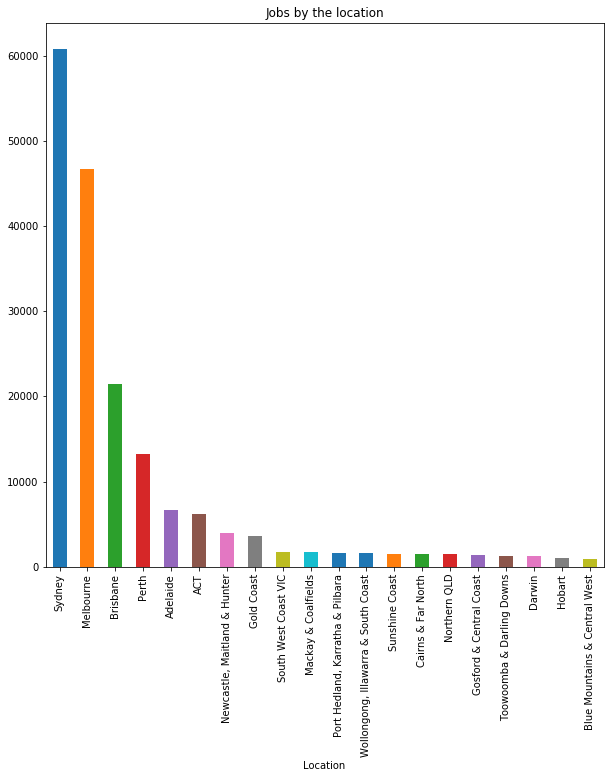

In [70]:
# visualize number of job by location
vsl = data[['Classification','Location','Date','HighestSalary','Title']]
vsl=vsl.dropna()
job_by_loc= vsl.groupby('Location')['Title'].count().sort_values(ascending=False).head(20)
job_by_loc.plot.bar(figsize=(10,10),title = ('Jobs by the location'))

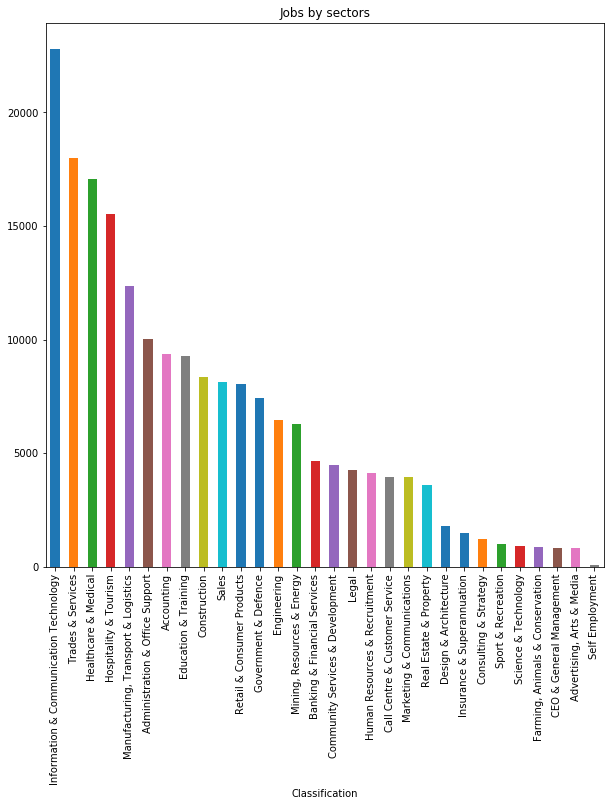

In [74]:
#Visualize number of job by sector
job_sector=vsl.groupby('Classification')['Title'].count().sort_values(ascending=False).head(30)
job_sector.plot.bar(figsize=(10,10),title=('Jobs by sectors'))

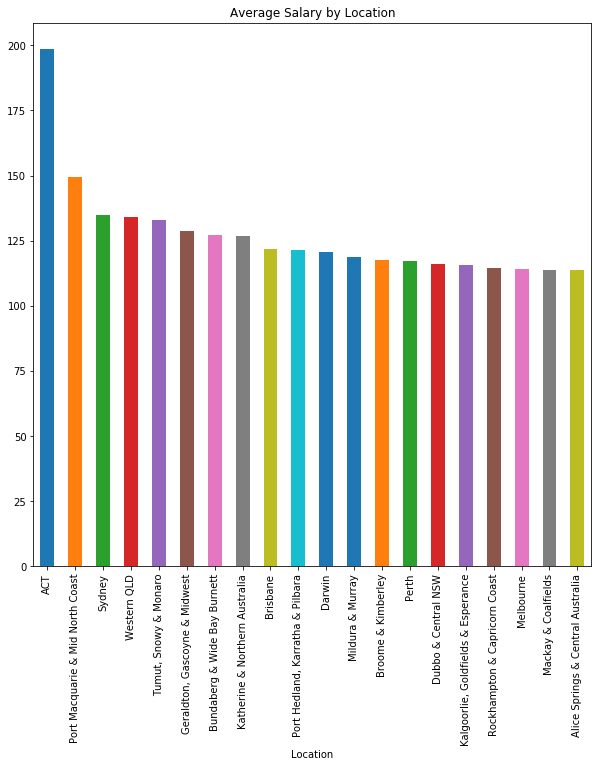

In [79]:
#Avg salary by location
avg_sal=vsl.groupby('Location')['HighestSalary'].mean().sort_values(ascending=False).head(20)
avg_sal.plot.bar(figsize=(10,10),title=('Average Salary by Location'))

## 5) Using PySpark for data analysis

## PART 3

## 1) The finding of your data analytics (Vu)

## 2) Actions for balancing the markets do you suggest based on your finding? (Vu)

## 3) Refine the data analytics?(Vu)

## 4) Are there any implications for employer and employees base on the finding you obtained? Justify your answer (Vu)

## 5) Present and visualize your data story on a online web page[optional]

Author:
<br>    Tran Hoang Dung - 16521654
<br>    Tat Quang Vu - 16521459
